#Covid-19 Cases

Using an API to get data about covid for each country

In [2]:
#the data from the API is updated daily
import requests
URL = 'https://api.apify.com/v2/key-value-stores/SmuuI0oebnTWjRTUh/records/LATEST?disableRedirect=true'
response = requests.get(URL).json()

Downloading data science libraries to transform the data from json file into a dataframe that we can work with later

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#parsing through the data in the json file and appending each feature into a list
country = []
totalCases = []
newCases = []
totalDeaths = []
newDeaths = []
totalRecovered = []
activeCases =[]
seriousCritical = []
casesPerMil = []
deathsPerMil = []
totalTests = []
testsPerMil = []
population = []
for region in response['regionData']:
  country.append(region['country'])
for region in response['regionData']:
  totalCases.append(region['totalCases'])
for region in response['regionData']:
  newCases.append(region['newCases'])
for region in response['regionData']:
  totalDeaths.append(region['totalDeaths'])
for region in response['regionData']:
  newDeaths.append(region['newDeaths'])
for region in response['regionData']:
  totalRecovered.append(region['totalRecovered'])
for region in response['regionData']:
  activeCases.append(region['activeCases'])
for region in response['regionData']:
  seriousCritical.append(region['seriousCritical'])
for region in response['regionData']:
  casesPerMil.append(region['casesPerMil'])
for region in response['regionData']:
  deathsPerMil.append(region['deathsPerMil'])
for region in response['regionData']:
  totalTests.append(region['totalTests'])
for region in response['regionData']:
  testsPerMil.append(region['testsPerMil'])
for region in response['regionData']:
  population.append(region['population'])                      

In [5]:
#concatenate the lists into a single dataframe
df = pd.DataFrame()
df['country'] = country
df['totalCases'] = totalCases
df['newCases'] = newCases
df['totalDeaths'] = totalDeaths
df['newDeaths'] = newDeaths
df['totalRecovered'] = totalRecovered
df['activeCases'] = activeCases
df['seriousCritical'] = seriousCritical
df['casesPerMil'] = casesPerMil
df['deathsPerMil'] = deathsPerMil
df['totalTests'] = totalTests
df['testsPerMil'] = testsPerMil
df['population'] = population

In [6]:
df.head()

,country,totalCases,newCases,totalDeaths,newDeaths,totalRecovered,activeCases,seriousCritical,casesPerMil,deathsPerMil,totalTests,testsPerMil,population
0,World,172982498,87962,3719080,2227,155940935.0,13322483.0,88717,22192,477.1,0.0,0,0
1,Asia,51964520,60324,700218,1135,48298987.0,2965315.0,29137,0,0.0,0.0,0,0
2,Europe,46790589,20355,1076623,751,43871793.0,1842173.0,13055,0,0.0,0.0,0,0
3,North America,39910000,3919,901062,229,32811255.0,6197683.0,13447,0,0.0,0.0,0,0
4,USA,34174823,71,611612,1,28025575.0,5537636.0,5807,102691,1838.0,482399824.0,1449556,332791423


In [7]:
df.shape

(238, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          238 non-null    object 
 1   totalCases       238 non-null    int64  
 2   newCases         238 non-null    int64  
 3   totalDeaths      238 non-null    int64  
 4   newDeaths        238 non-null    int64  
 5   totalRecovered   237 non-null    float64
 6   activeCases      237 non-null    float64
 7   seriousCritical  238 non-null    int64  
 8   casesPerMil      238 non-null    int64  
 9   deathsPerMil     238 non-null    float64
 10  totalTests       238 non-null    float64
 11  testsPerMil      238 non-null    int64  
 12  population       238 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 24.3+ KB


In [9]:
df.country.values

array(['World', 'Asia', 'Europe', 'North America', 'USA', 'South America',
       'India', 'Brazil', 'France', 'Turkey', 'Russia', 'Africa', 'UK',
       'Italy', 'Argentina', 'Germany', 'Spain', 'Colombia', 'Iran',
       'Poland', 'Mexico', 'Ukraine', 'Peru', 'Indonesia', 'South Africa',
       'Czechia', 'Netherlands', 'Chile', 'Canada', 'Philippines', 'Iraq',
       'Romania', 'Sweden', 'Belgium', 'Pakistan', 'Portugal', 'Israel',
       'Bangladesh', 'Hungary', 'Japan', 'Jordan', 'Serbia',
       'Switzerland', 'Austria', 'Malaysia', 'Nepal', 'UAE', 'Lebanon',
       'Morocco', 'Saudi Arabia', 'Ecuador', 'Bulgaria', 'Greece',
       'Belarus', 'Kazakhstan', 'Slovakia', 'Bolivia', 'Panama',
       'Paraguay', 'Croatia', 'Tunisia', 'Georgia', 'Azerbaijan',
       'Costa Rica', 'Kuwait', 'Palestine', 'Uruguay',
       'Dominican Republic', 'Denmark', 'Lithuania', 'Ethiopia', 'Egypt',
       'Ireland', 'Guatemala', 'Moldova', 'Slovenia', 'Bahrain',
       'Honduras', 'Venezuela', 'Arm

In [10]:
#since we want to have individual countries in the 'country' column, we will drop all the regions such us Europe, Africa and none country entities
region_drop = ['Europe', 'North America', 'Asia', 'South America', 'Africa', 'Oceania', '', 'Diamond Princess', 'MS Zaandam', 'Total:']
for i in range(df.country.size):
  if df.country[i] in region_drop:
    df.drop(i, axis = 0, inplace = True)


In [11]:
df.shape

(221, 13)

In [12]:
df.head()

,country,totalCases,newCases,totalDeaths,newDeaths,totalRecovered,activeCases,seriousCritical,casesPerMil,deathsPerMil,totalTests,testsPerMil,population
0,World,172982498,87962,3719080,2227,155940935.0,13322483.0,88717,22192,477.1,0.0,0,0
4,USA,34174823,71,611612,1,28025575.0,5537636.0,5807,102691,1838.0,482399824.0,1449556,332791423
6,India,28574350,1991,340719,0,26597655.0,1635976.0,8944,20520,245.0,357433846.0,256686,1392494128
7,Brazil,16803472,0,469784,0,15228983.0,1104705.0,8318,78539,2196.0,49612384.0,231886,213951414
8,France,5694076,0,109857,0,5378299.0,205920.0,2677,87056,1680.0,85454984.0,1306516,65406747


In [13]:
df.reset_index(inplace = True, drop = True)

In [14]:
df.head()

,country,totalCases,newCases,totalDeaths,newDeaths,totalRecovered,activeCases,seriousCritical,casesPerMil,deathsPerMil,totalTests,testsPerMil,population
0,World,172982498,87962,3719080,2227,155940935.0,13322483.0,88717,22192,477.1,0.0,0,0
1,USA,34174823,71,611612,1,28025575.0,5537636.0,5807,102691,1838.0,482399824.0,1449556,332791423
2,India,28574350,1991,340719,0,26597655.0,1635976.0,8944,20520,245.0,357433846.0,256686,1392494128
3,Brazil,16803472,0,469784,0,15228983.0,1104705.0,8318,78539,2196.0,49612384.0,231886,213951414
4,France,5694076,0,109857,0,5378299.0,205920.0,2677,87056,1680.0,85454984.0,1306516,65406747


In [15]:
#the first row pertaining to world has some missing values, we will use the rest of the rows to find them
total = 0
for i in range(df.country.size):
  total += df.totalTests[i]
df.iloc[0, 10] = total

total = 0
for i in range(df.country.size):
  total += df.testsPerMil[i]
df.iloc[0, 11] = total/219  

total = 0
for i in range(df.country.size):
  total += df.population[i]
df.iloc[0, 12] = total  

In [16]:
df.head()

,country,totalCases,newCases,totalDeaths,newDeaths,totalRecovered,activeCases,seriousCritical,casesPerMil,deathsPerMil,totalTests,testsPerMil,population
0,World,172982498,87962,3719080,2227,155940935.0,13322483.0,88717,22192,477.1,2.497845e+09,6.952517e+05,7828955152
1,USA,34174823,71,611612,1,28025575.0,5537636.0,5807,102691,1838.0,4.823998e+08,1.449556e+06,332791423
2,India,28574350,1991,340719,0,26597655.0,1635976.0,8944,20520,245.0,3.574338e+08,2.566860e+05,1392494128
3,Brazil,16803472,0,469784,0,15228983.0,1104705.0,8318,78539,2196.0,4.961238e+07,2.318860e+05,213951414
4,France,5694076,0,109857,0,5378299.0,205920.0,2677,87056,1680.0,8.545498e+07,1.306516e+06,65406747


In [17]:
df.describe()

,totalCases,newCases,totalDeaths,newDeaths,totalRecovered,activeCases,seriousCritical,casesPerMil,deathsPerMil,totalTests,testsPerMil,population
count,2.210000e+02,221.000000,2.210000e+02,221.000000,2.200000e+02,2.200000e+02,221.000000,221.000000,221.000000,2.210000e+02,2.210000e+02,2.210000e+02
mean,1.565449e+06,796.036199,3.365676e+04,20.153846,1.409820e+06,1.208287e+05,802.868778,34243.140271,578.926697,2.260494e+07,6.921058e+05,7.085027e+07
std,1.204020e+07,6037.194756,2.567302e+05,154.256115,1.085691e+07,9.782112e+05,6074.837867,38496.554006,791.941586,1.732816e+08,1.248424e+06,5.425558e+08
min,1.000000e+00,0.000000,0.000000e+00,0.000000,1.000000e+00,0.000000e+00,0.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,8.030000e+02
25%,6.597000e+03,0.000000,9.000000e+01,0.000000,4.134500e+03,1.107500e+02,0.000000,2099.000000,27.000000,1.136680e+05,4.868000e+04,6.353350e+05
50%,4.975900e+04,0.000000,8.180000e+02,0.000000,4.497950e+04,3.104500e+03,9.000000,18642.000000,212.000000,8.858920e+05,2.566860e+05,6.623082e+06
75%,3.504870e+05,42.000000,6.388000e+03,0.000000,3.030268e+05,1.866650e+04,129.000000,61877.000000,853.000000,5.095729e+06,7.304530e+05,2.500646e+07
max,1.729825e+08,87962.000000,3.719080e+06,2227.000000,1.559409e+08,1.332248e+07,88717.000000,177723.000000,5551.000000,2.497845e+09,9.975345e+06,7.828955e+09


The pie chart below gives us an overview of the distrubution of cases in relation to countries

Text(0, 0.5, '')

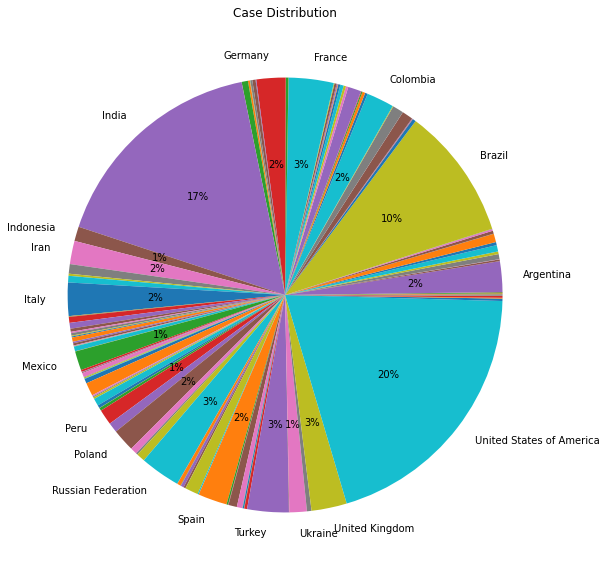

In [28]:
total = df['totalCases'].sum(axis = 0)
countries_disp = []
for region in df.index:
  if df.loc[region]['totalCases'] / total > 0.01:
    countries_disp.append(region)
  else:
    countries_disp.append(' ')  

def pct_floor_val(pct):
  return ('%1.0f%%' % pct) if pct > 1 else ''

plt.figure(figsize = (10, 10))
df['totalCases'].plot(kind = 'pie', autopct = pct_floor_val, labels = countries_disp, labeldistance = 1.1)
plt.title('Case Distribution')
plt.ylabel('')

We will plot a world map to display the spread of cases in relation to countries

In [18]:
# installing the geojson library to be able to use a geojson file to define the borders in our map
!pip install geojson

In [19]:
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json
world_geo = r'world_countries.json'
import json
with open(world_geo) as f:
  data = json.load(f)

In [20]:
#we create a list of countries in our geojson file to compare them to the list of countries in our dataframe
geo_countries = []
for i in range(len(data['features']) -1):
  geo_countries.append(data['features'][i]['properties']['name'])

In [22]:
df.sort_values(by = 'country', inplace = True)
df.country.values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'CAR', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Caribbean Netherlands',
       'Cayman Islands', 'Chad', 'Channel Islands', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czech Republic', 'DRC',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands',
       'F

In [23]:
geo_countries.sort()
geo_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'French Southern and Antarctic Lands',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 '

we notice there are some variations in the naming of countries, we fix that by the code below

In [21]:
for i in range(df.country.size):
  if df.country[i] == 'USA':
    df.country[i] = 'United States of America' 
  if df.country[i] == 'Russia':
    df.country[i] = 'Russian Federation'  
  if df.country[i] == 'UK':
    df.country[i] = 'United Kingdom'
  if df.country[i] == 'Czechia':
    df.country[i] = 'Czech Republic'
  if df.country[i] == 'S. Korea':
    df.country[i] = 'South Korea'    
  if df.country[i] == 'UAE':
    df.country[i] = 'United Arab Emirates'   
  if df.country[i] == 'Congo':
    df.country[i] = 'Democratic Republic of the Congo'  
  if df.country[i] == 'Guinea-Bisseau':
    df.country[i] = 'Guinea Bisseau'  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib

In [24]:
df.set_index('country', inplace = True)

In [25]:
df.head()

,totalCases,newCases,totalDeaths,newDeaths,totalRecovered,activeCases,seriousCritical,casesPerMil,deathsPerMil,totalTests,testsPerMil,population
country,,,,,,,,,,,,
Afghanistan,77938,1310,3097,29,58144.0,16697.0,1124,1962,78.0,488750.0,12301.0,39732214
Albania,132360,0,2451,0,129566.0,343.0,18,46040,853.0,730775.0,254192.0,2874896
Algeria,129976,0,3497,0,90517.0,35962.0,23,2916,78.0,230861.0,5179.0,44578139
Andorra,13752,0,127,0,13527.0,98.0,4,177723,1641.0,193595.0,2501906.0,77379
Angola,35140,0,784,0,28646.0,5710.0,11,1040,23.0,581769.0,17212.0,33801047


In [26]:
# dropping countries that are not in the geojson file to plot them on a map
for region in df.index:
  if (region not in geo_countries):
    df.drop(region, inplace = True, axis = 0)

In [27]:
df.index.size

158

In [29]:
import folium
from folium import Map
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data = df,
    columns = [df.index, 'totalCases'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd',
    nan_fill_color = 'white',
    bins = 9,
    fill_opacity = 0.7, 
    line_opacity = 0.2,
    legend_name = 'Total Cases',  
)
world_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


Uploading data reflecting the evolution of cases per day for every country (time series)

In [30]:
#this dataset is updated daily
url1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_git = pd.read_csv(url1)

In [31]:
df_git.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,58843,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130537,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,120922,121112,121344,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13060,13083,13121,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25609,25710,25942,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140


In [32]:
df_git.shape

(276, 503)

In [33]:
df_git['Country/Region'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Australia', 'Australia', 'Australia', 'Australia', 'Australia',
       'Australia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'Chi

In [34]:
for i in range(df_git['Country/Region'].size):
  if df_git['Country/Region'][i] in region_drop:
    df_git.drop(i, axis = 0, inplace = True)

In [35]:
df_git['Country/Region'].value_counts()

China                  34
Canada                 16
United Kingdom         12
France                 12
Australia               8
                       ..
Finland                 1
Grenada                 1
Antigua and Barbuda     1
Laos                    1
Solomon Islands         1
Name: Country/Region, Length: 191, dtype: int64

In [36]:
#some columns will be irrelevant to our analysis, so we will drop them
df_git = df_git.drop(columns = ['Province/State','Lat','Long'])

In [37]:
'''as seen above, some countries entries are repeated multiple times in multiple rows due to data entry by region within a country, we will
group the data based on country to have a single row for each country'''
df2 = df_git.groupby(['Country/Region'], axis = 0).sum()

In [38]:
df2.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,58843,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130537,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,120922,121112,121344,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13060,13083,13121,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25609,25710,25942,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140


In [39]:
df_git.shape

(274, 500)

In [40]:
df2.shape

(191, 499)

Text(0.5, 1.0, 'Cases in the US')

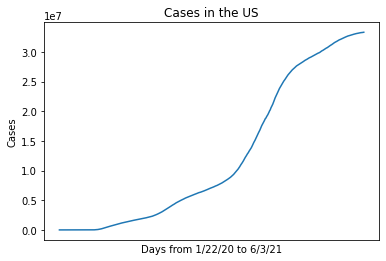

In [41]:
plt.plot(df2.loc['US'])
plt.xticks(ticks = [])
start = df2.loc['US'].index[0]
finish = df2.loc['US'].index[df2.loc['US'].size-1]
plt.xlabel(f'Days from {start} to {finish}')
plt.ylabel('Cases')
plt.title('Cases in the US')

Text(0.5, 1.0, 'Cases in China')

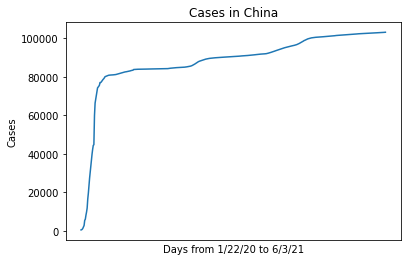

In [42]:
plt.plot(df2.loc['China'])
plt.xticks(ticks = [])
start = df2.loc['China'].index[0]
finish = df2.loc['China'].index[df2.loc['China'].size-1]
plt.xlabel(f'Days from {start} to {finish}')
plt.ylabel('Cases')
plt.title('Cases in China')

Text(0.5, 1.0, 'Cases in India')

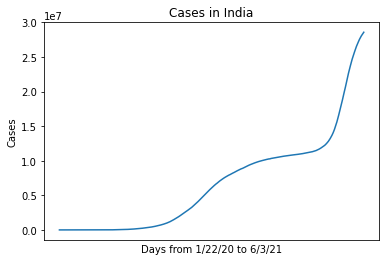

In [43]:
plt.plot(df2.loc['India'])
plt.xticks(ticks = [])
plt.xlabel(f'Days from {start} to {finish}')
plt.ylabel('Cases')
plt.title('Cases in India')

Text(0.5, 1.0, 'Cases in Brazil')

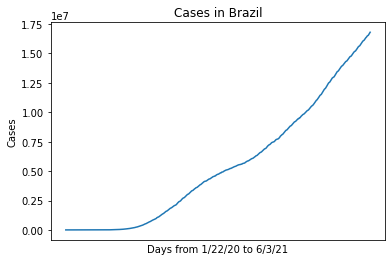

In [48]:
plt.plot(df2.loc['Brazil'])
plt.xticks(ticks = [])
plt.xlabel(f'Days from {start} to {finish}')
plt.ylabel('Cases')
plt.title('Cases in Brazil')

In [44]:
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
                'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 
                'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 
                'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

In [45]:
df2.loc[eu_countries].sum(axis = 0)

1/22/20           0
1/23/20           0
1/24/20           2
1/25/20           3
1/26/20           3
             ...   
5/30/21    32170513
5/31/21    32191776
6/1/21     32222425
6/2/21     32256347
6/3/21     32302876
Length: 499, dtype: int64

Text(0.5, 1.0, 'Cases in the EU')

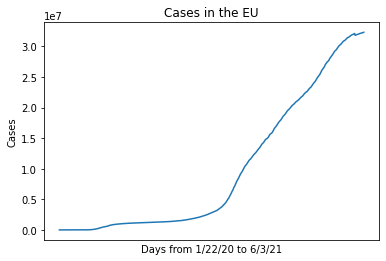

In [46]:
plt.plot(df2.loc[eu_countries].sum(axis = 0))
plt.xticks(ticks = [])
plt.xlabel(f'Days from {start} to {finish}')
plt.ylabel('Cases')
plt.title('Cases in the EU')

We notice the slope for the graphs relating to US, EU, India and especially Brazil have a large positive slope while China has flattened the curve within the first few weeks of the pandemic.